CAM과 Grad-CAM

https://tyami.github.io/deep%20learning/CNN-visualization-Grad-CAM/

XAI(explainable AI)는 AI 모델의 동작과 결정 과정을 설명 가능한 방식으로 이해할 수 있도록 하는 개념으로, 컴퓨터 비전에서의 대표적인 방법은 CAM, Grad-CAM 이 있었습니다.

**CAM(Class Activation Map)**은 모델이 어떤 곳을 보고 어떤 클래스임을 짐작하고 있는지를 확인할 수 있는 지도로, Fully Convolution Network를 지나고 나온 Feature Map을 GAP(Global Average Pooling)을 거치고 FC layer(Fully Connected layer)를 지나 얻게 된 FC lyaer의 가중치를 얻은 다음, Fully Convolution Network를 지나고 나온 Feature Map에 첫번째 Step에서 얻어진 FC layer의 가중치와 행렬연산을 하여 Object Localization Map을 얻는 방식입니다.

CAM은 모델의 구조가 제한되는 문제점이 있어서 이를 해결하기위해 다양한 모델의 구조를 해석할 수 있는 방법인 Grad-CAM(Gradient CAM) 방법론이 제안되며, Grad-CAM 은 모델 구조를 변경할 필요 없이 구할 수 있다는 장점이 있습니다.

**Grad-CAM**을 만들기 위해서 Convolutional layer에서의 gradient를 활용하여 해당 gradient와 Convolutional layer's feature maps과 곱연산하여 추가적으로 ReLU Activation function을 거친 값을 input이미지에 heat-map표현을 해주는 것으로 Grad-CAM을 표현할 수 있습니다.

    이전 스텝에서 본 CAM 함수와 달리, Grad-CAM은 이번에는 어떤 레이어든 CAM 이미지를 뽑아낼 수 있다.

***

**CAM**

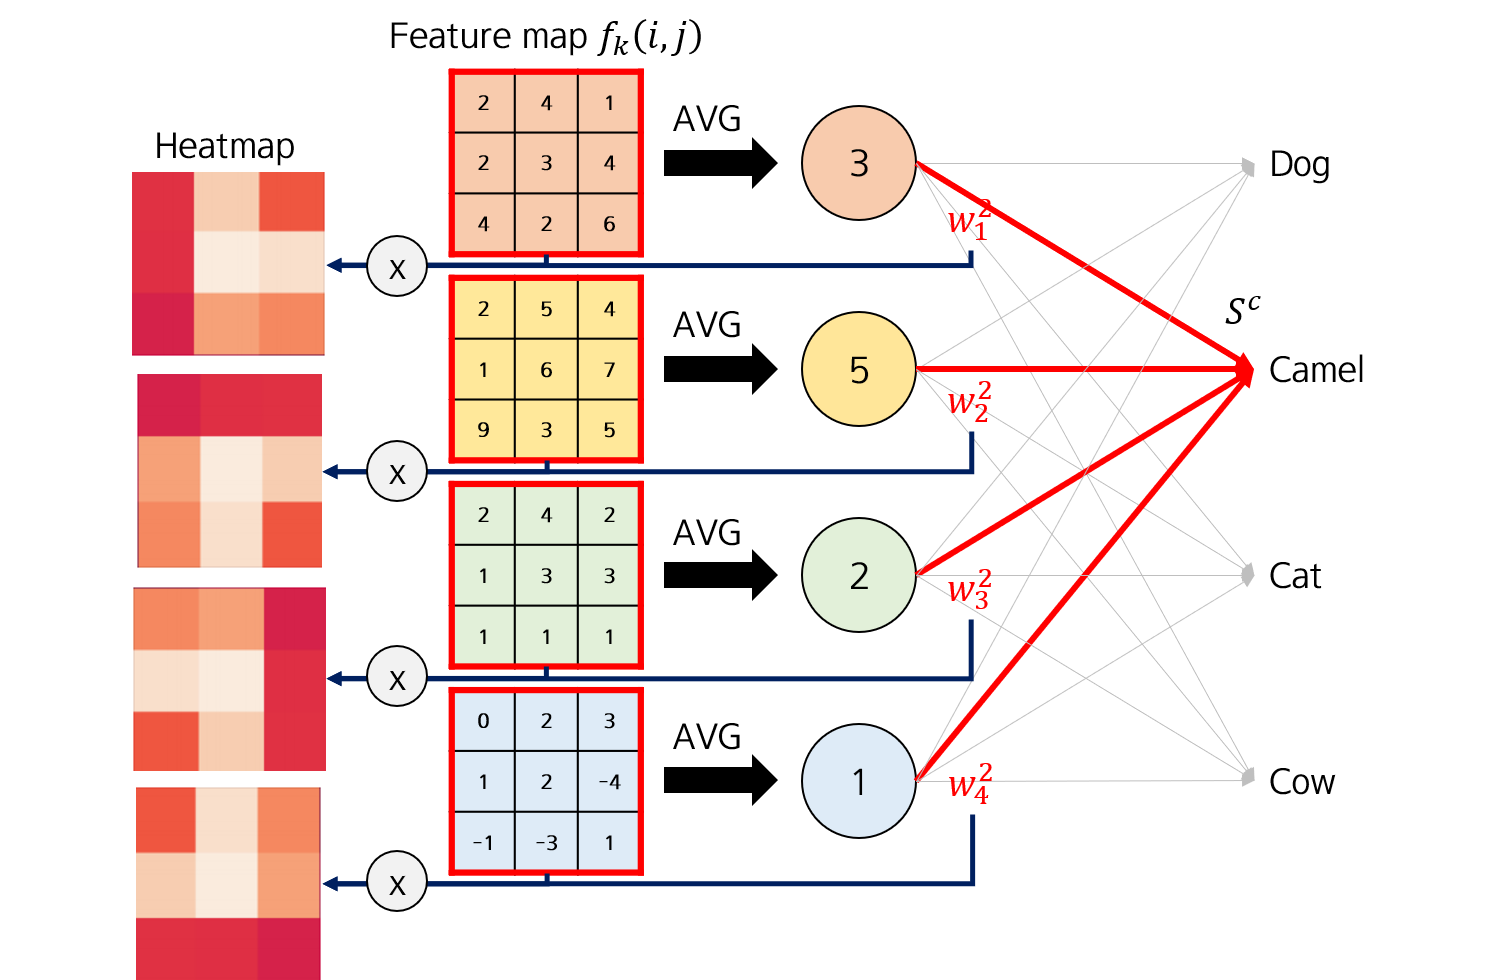

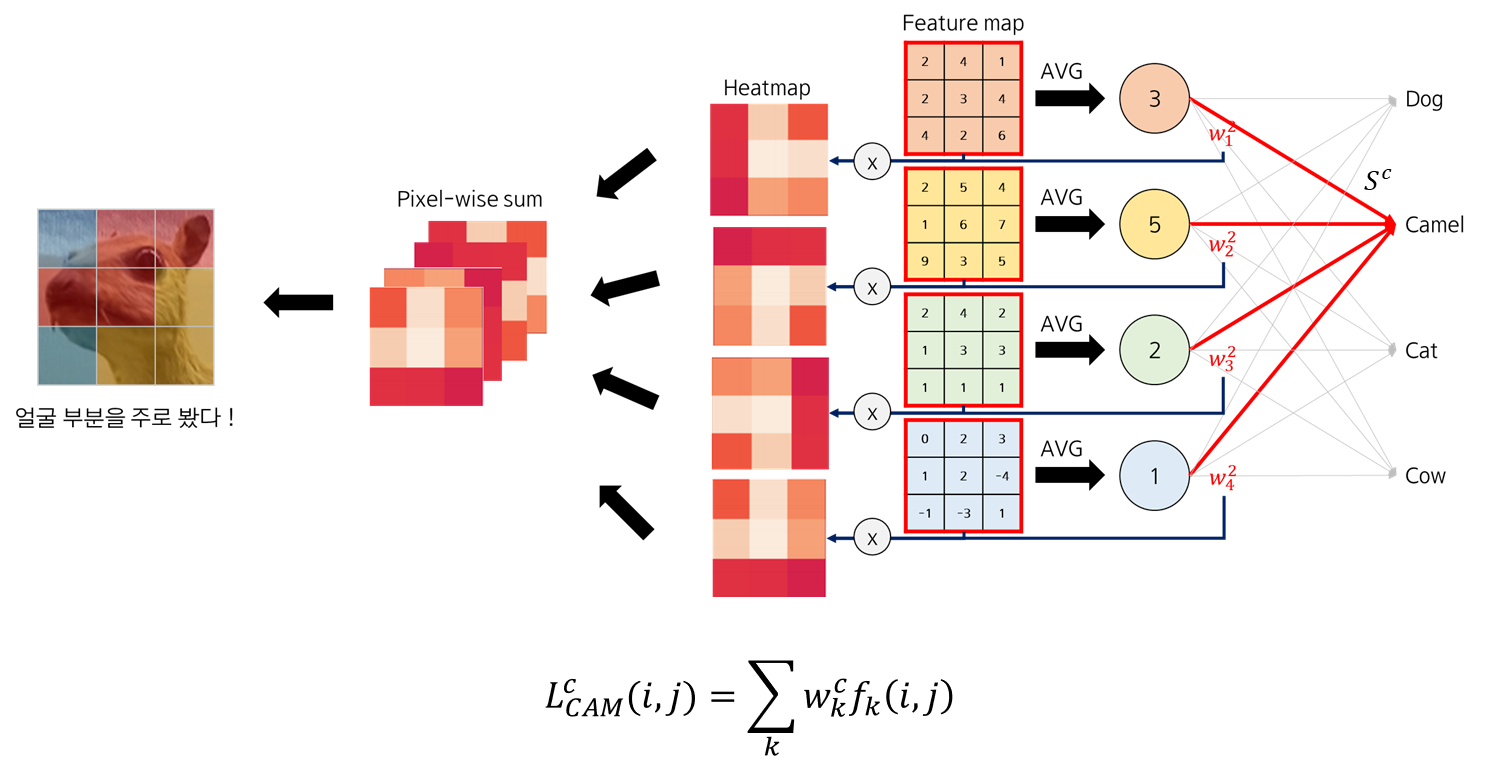

***
**Grad-CAM**

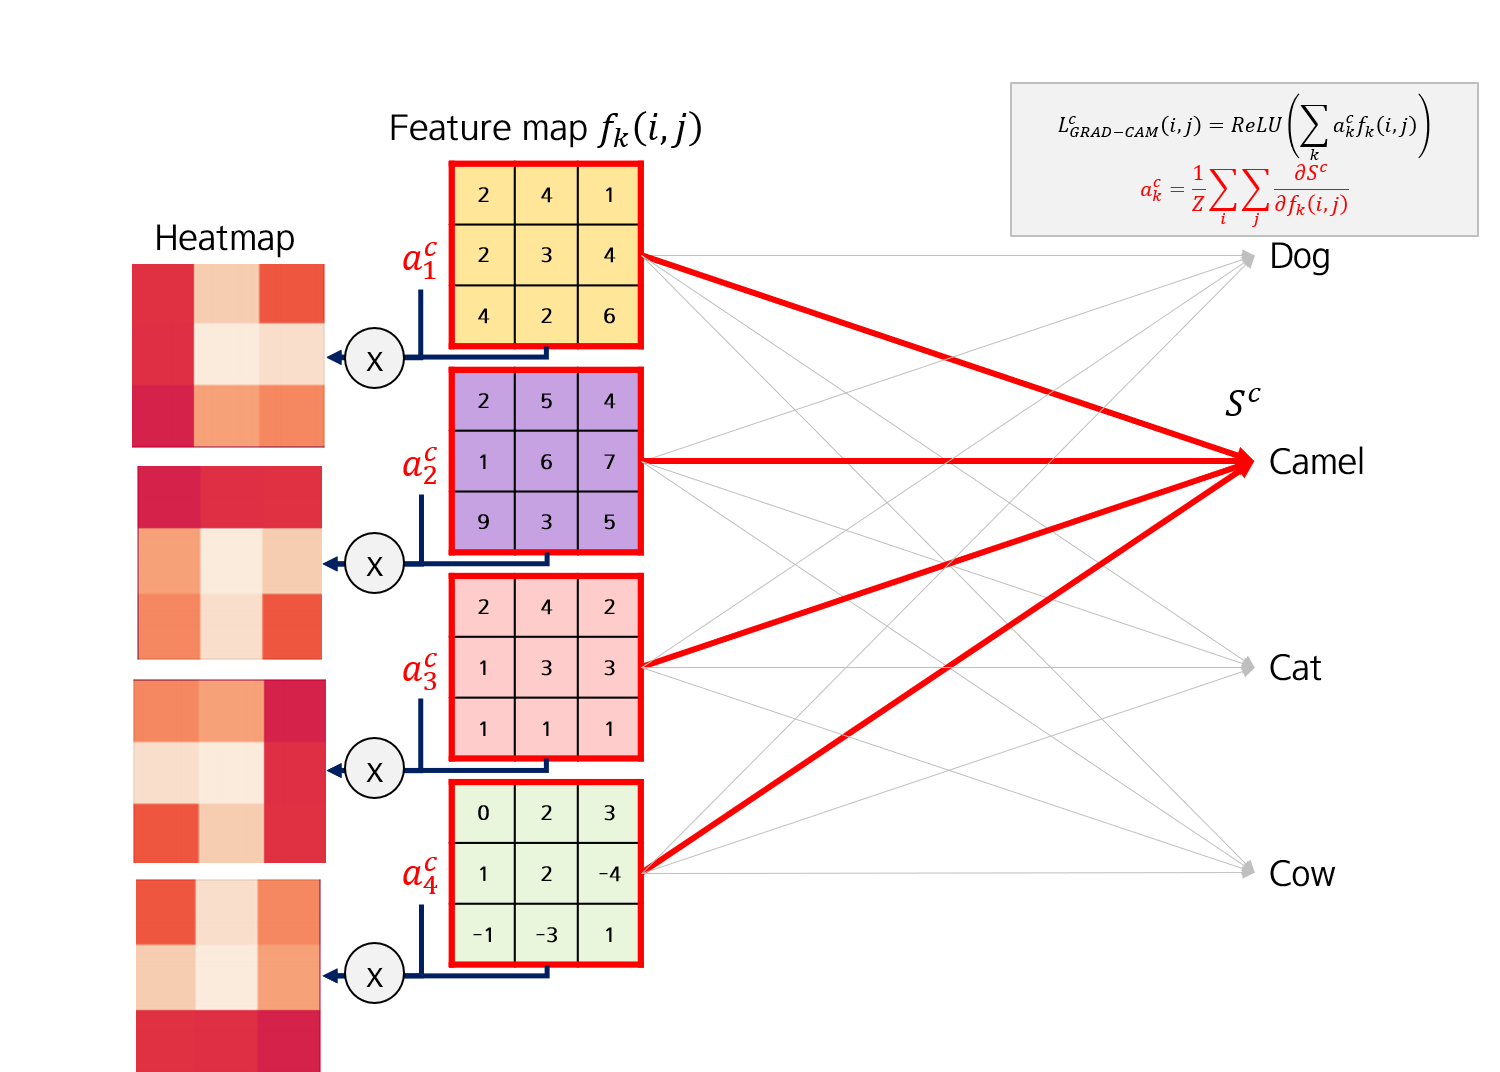

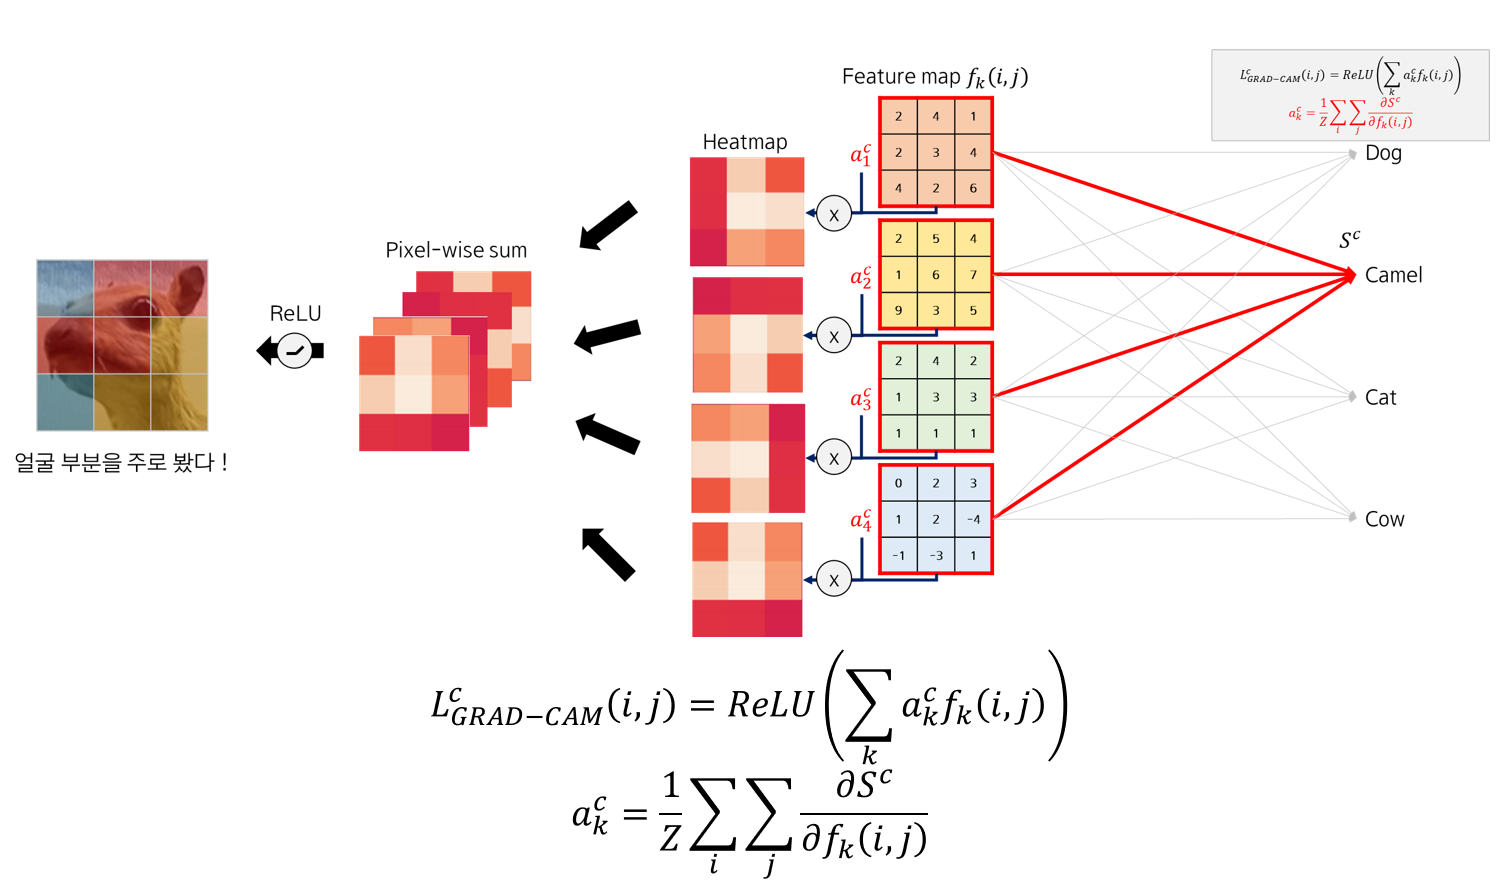

***
Grad-CAM을 활용하여 모델의 예측을 변경하면서 객체 검출을 수행하는 것을 의미합니다.

구체적으로, Grad-CAM은 모델이 이미지의 어떤 부분을 어떤 클래스로 판단하고 있는지를 시각화하기 위해 사용됩니다. 그러나 이 아이디어에서는 Grad-CAM을 사용하여 모델의 예측을 변경하는 방법을 제안하고 있습니다.

예를 들어, 모델이 개를 인식하고 있는 상황에서 Grad-CAM을 통해 모델이 개를 인식하는 부분의 중요도를 낮추면, 모델은 해당 이미지에서 개를 더 이상 인식하지 않을 수 있습니다. 그런 다음 Grad-CAM을 사용하여 모델이 어떤 부분을 개로 인식하지 않으면서 객체 검출을 수행하는 방법을 제시하고 있습니다.

이 접근 방식은 모델의 동작을 해석하고 변경하는 방법을 탐구하는 연구 분야에서 사용될 수 있으며, 모델의 예측과 객체 검출을 조작하는 데 활용될 수 있습니다.

=> 약지도학습(weakly supervised learning)
***

**Adversarial Complementary Learning**

CAM과 Grad-CAM은 Weaky-supervised 방식의 Object Detection, Segmentation의 가능성을 보여 주었습니다. 그러나 이들 방식에는 한 가지 문제가 있습니다. CAM을 통해 본 활성화 맵을 보면 **가장자리보다는 특징이 주로 나타나는 위치에 중점적으로 활성화**되는 모습을 볼 수 있습니다.

하지만 물체 검출(Object detection)은 새의 부리나 동물의 눈, 시계의 숫자와 같이 부분적 특성이 아닌 물체의 전체적인 형태와 윤곽을 정확하게 구분해 내는 것이 중요합니다. CAM 모델이 특정 부위에 집중해 학습하는 것을 막기 위해서 **ACoL**은 브랜치를 두 가지로 두어 너무 높은 점수를 지워줌으로써 주변의 특성 또한 반영하도록 했습니다. 이러한 과정을 논문에서는 Adversial, 즉 적대적인 학습방법이라고 합니다.

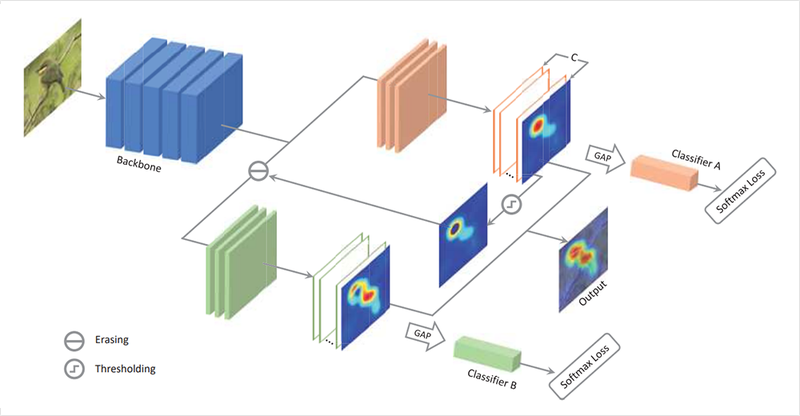

ACoL의 구조를 살펴보면 먼저 위쪽 주황색 브랜치를 거칩니다. 특성 맵은 GAP을 거쳐 CAM에서 보았던 소프트맥스 레이어인 Classifier A를 거치게 됩니다. 이 브랜치는 loss로 학습됩니다.

ACoL은 여기서 얻어진 활성화 맵을 적대적인 방법으로 사용합니다. 일정 값 이상 활성화된 활성화 맵을 지우도록 하는 것이지요. Classifier A는 쉽게 전체적인 이미지를 보고 클래스를 판별할 수 있는 반면에 Classifier B는 A의 CAM에서 크게 활성화된 영역을 지운 활성화 맵에서 분류를 해야 하기 때문에 더 어려운 문제를 푸는 것으로 볼 수 있습니다.

이렇게 두 가지 Classifier A와 Classifier B를 학습시킴으로써 더 넓은 영역을 판별의 근거로 삼을 수 있습니다. 이 과정을 통해서 모델은 쉽게 맞출 수 있는 샘플을 어렵게 다시 한 번 학습을 하는 Adversarial Complementary Learning 과정을 거치게 됩니다.

결과적으로 위 그림에서는 기존 CAM이 활성화되는 부분과 달리 ACoL은 물체의 전반적인 영역으로 CAM이 활성화되는 효과를 확인할 수 있습니다.

***
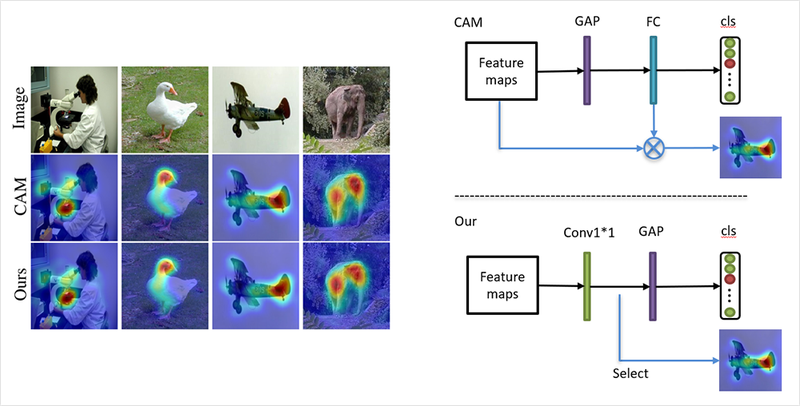

CAM

Fully Convolution Network -> GAP -> Fully Connected layer -> Softmax

ACoL

Fully Convolution Network -> Convolution Layer -> GAP -> Softmax

ACoL 자료

https://biology-statistics-programming.tistory.com/177